# Descriptive Statistics

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week2/04_descriptive_stats.ipynb)

An arbitrary distribution function $h(x)$ can be characterised by it's "location" parameters, "scale" parameters, and "shape" parameters. These parameters are known as descriptive statistics.  "When these parameters are based on the distribution $h(x)$ itself, we talk about population statistics; when based on a finite-size data set sampled from $h(x)$, they are called sample statistics."

## Definitions of descriptive statistics

**Arithmetic mean (expectation value):** a location parameter that quantifies where most of the probability density is located.

 $$\mu = E(x) = \int_{-\infty}^\infty x h(x)\:d x$$

**Variance:** a scale parameter that quantifies how wide a distribution is, calculated by the average of the squared differences from the mean.

 $$ V = \int_{-\infty}^\infty (x-\mu)^2 h(x)d x$$

**Standard deviation:** the square root of variance; it's a scale sometimes preferred over variance since it's units are the same as that of the mean rather than units$^2$.

 $$\sigma = \sqrt{V}$$

**Skewness:** a shape parameter that quantifies how asymmetric a distribution is. Symmetric distributions, such as uniform, Gaussian, and Laplace distributions, have no skewness.

 $$ \Sigma = \int_{-\infty}^\infty \bigg(\frac{x-\mu}{\sigma}\bigg)^3   h(x) d x$$

**Kurtosis:** a shape parameter that quantifies the "tailedness"    (the weight of a distribution's tails relative to the center) of a probability distribution. Highly peaked (“leptokurtic”) distributions have positive kurtosis, and flat-topped (“platykurtic”) distributions have negative kurtosis. The Gaussian distribution is "mesokurtic", meaning it has zero kurtosis.

 $$K = \int_{-\infty}^\infty\bigg(\frac{x-\mu}{\sigma}\bigg)^4 h(x) d x -3$$

*Note: the definition that the textbook uses is sometimes called "excess kurtosis" in other sources.*

**Absolute deviation about d:** the average distance between each data point and the mean. When taken about the median, the absolute deviation is minimized.

 $$\delta = \int_{-\infty}^\infty |x-d|h(x) dx$$

**Mode:** a location parameter that corresponds to the most probable values, which occur where the derivative is zero (i.e. peaks). However, this isn't the most reliable location parameter;
it can be misleading distributions with multiple sharp but narrow peaks. It can also be hard to estimate from samples.

 $$ \bigg(\frac{dh(x)}{dx}\bigg)_{x_m} =0$$

**Percent quantiles:** segments dividing the range of a probability distribution into continuous intervals with equal probabilities. The most often used quantiles are the median, $q_{50}$, and the first and third quartile, $q_{25}$ and $q_{75}$. The difference between the third and the first quartiles is called the interquartile range.

 $$\frac{p}{100} = \int_{-\infty}^{q_p}h(x)dx$$

---

*Note: The higher a moment is, the harder it is to estimate it with small samples. Furthermore, there is more sensitivity to outliers (less robustness); for these reasons, higher-order moments, such as skewness and kurtosis, should be used with caution when samples are small.*

*Additionally, some distributions, such as the Cauchy distribution, do not have finite variance. So, when the distribution’s variance is infinite (i.e., the tails of $h(x)$ do not decrease faster than $x$−3 for large $|x|$), the skewness and kurtosis will diverge as well.*

-----

In the example below, we'll show distributions with different skewness (top panel) and kurtosis (bottom panel). In the top panel, we'll plot a Gaussian, a modified Gaussian, and a log-normal distribution with $\sigma = 1.2$. The modified Gaussian is a normal distribution multiplied by a Gram-Charlier series $ h(x) = N(\mu,\sigma)\sum_{k=0}^\infty a_k H_k(z)$ with $a_0 = 2$, $a_1 = 1$, and $a_2 = 0.5$. For the kurtosis panel, we'll plot a uniform, Laplace, cosine, and Gaussian distribution.


We can find the values for skewness and kurtosis for each distribution by importing the desired distribution from`scipy.stats`. For example, we can call `from scipy.stats import uniform` and then call `uniform.stats(moments='sk')` to get the skewness and kurtosis for a uniform distribution. For the modified Gaussian however, we will hard-code $\Sigma = -0.36.$

In [1]:
from scipy.stats import uniform, norm, laplace, cosine, lognorm

uni = float(uniform.stats(moments = 'k'))
lap = int(laplace.stats(moments = 'k'))
cos = float(cosine.stats(moments = 'k'))
log = float(lognorm.stats(1.2, moments = 's'))

gauss = norm.stats(moments = 'sk')
skew_gauss = int(gauss[0])
kurt_gauss = int(gauss[1])

Next, we'll plot the distributions.

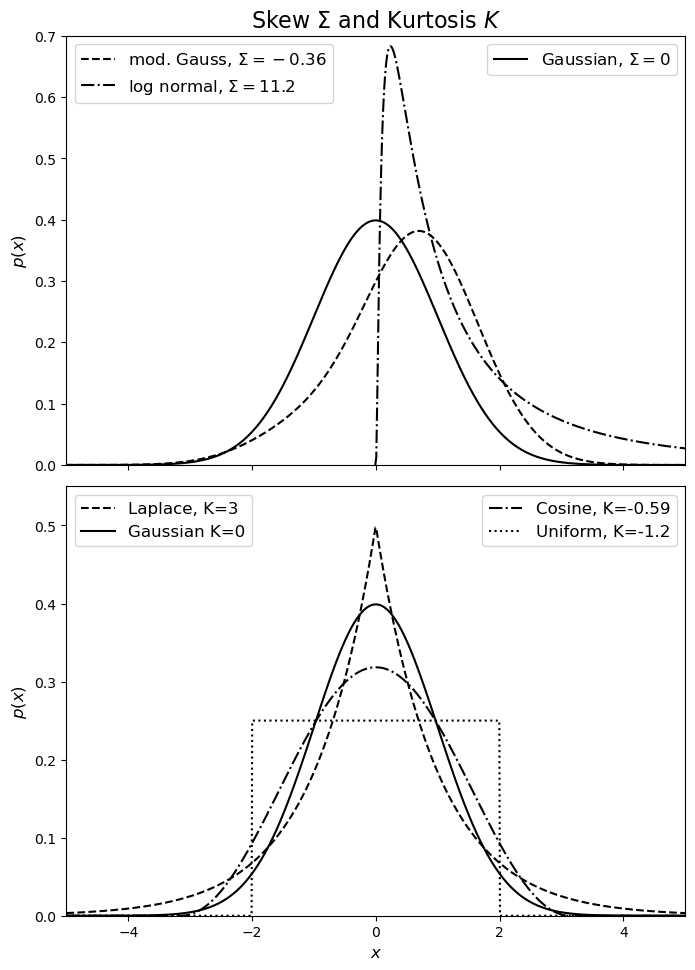

In [2]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(7.5, 10))
fig.subplots_adjust(right=0.95, hspace=0.05, bottom=0.07, top=0.95)

# First show distributions with different skeq
ax = fig.add_subplot(211)
x = np.linspace(-8, 8, 1000)
N = stats.norm(0, 1)

l1, = ax.plot(x, N.pdf(x), '-k',
              label='Gaussian, $\Sigma={}$'.format(skew_gauss))
l2, = ax.plot(x, 0.5 * N.pdf(x) * (2 + x + 0.5 * (x * x - 1)),
              '--k', label= 'mod. Gauss, $\Sigma=-0.36$')
l3, = ax.plot(x[499:], stats.lognorm(1.2).pdf(x[499:]), '-.k',
              label='log normal, $\Sigma={}$'.format(round(log,1)))

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.7001)
ax.set_ylabel('$p(x)$', fontsize = 12)
ax.xaxis.set_major_formatter(plt.NullFormatter())

# trick to show multiple legends
leg1 = ax.legend([l1], [l1.get_label()], loc=1, fontsize = 12)
leg2 = ax.legend([l2, l3], (l2.get_label(), l3.get_label()), loc=2, fontsize = 12)
ax.add_artist(leg1)
ax.set_title('Skew $\Sigma$ and Kurtosis $K$', fontsize = 16)

# next show distributions with different kurtosis
ax = fig.add_subplot(212)
x = np.linspace(-5, 5, 1000)
l1, = ax.plot(x, stats.laplace(0, 1).pdf(x), '--k',
              label='Laplace, K={}'.format(lap))
l2, = ax.plot(x, stats.norm(0, 1).pdf(x), '-k',
              label='Gaussian K={}'.format(kurt_gauss))
l3, = ax.plot(x, stats.cosine(0, 1).pdf(x), '-.k',
              label='Cosine, K=-0.59'.format(round(cos,2)))
l4, = ax.plot(x, stats.uniform(-2, 4).pdf(x), ':k',
              label='Uniform, K=-1.2'.format(uni))

ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.55)
ax.set_xlabel('$x$', fontsize = 12)
ax.set_ylabel('$p(x)$', fontsize = 12)

# trick to show multiple legends
leg1 = ax.legend((l1, l2), (l1.get_label(), l2.get_label()), loc=2, fontsize = 12)
leg2 = ax.legend((l3, l4), (l3.get_label(), l4.get_label()), loc=1,fontsize = 12)
ax.add_artist(leg1)

plt.show()

Note that the highly peaked Laplace distribution has positive kurtosis while the flat-topped uniform distribution has negative kurtosis. As for skew, the modified distribution with a longer tail on the left has a negative skew, whereas the log-normal distribution with a longer tail on the right has a positive skew.

### Useful NumPy and SciPy functions

The cell below computes multiple statistical functions on a one-dimensional array **x**.

In [3]:
import numpy as np
import scipy.stats
x = np.random.random(100) # 100 random numbers

q25, q50, q75 = np.percentile(x, [25, 50, 75])
mean = np.mean(x)
median = np.median(x)
variance = np.var(x)
standard_deviation = np.std(x)
skew = scipy.stats.skew(x)
kurtosis = scipy.stats.kurtosis(x)
mode = scipy.stats.mode(x)

## Data-based estimates of descriptive statistics

Any of these quantities can be estimated directly from data, in which case they are called sample statistics (instead of population statistics). Assume we are given $N$ measurements, $x_i$, where $i$ ranges from 1 to $N$. In general, when estimating the above quantities for a sample of N measurements, the integrals of the form $\int_{-\infty}^{\infty} g(x)h(x)dx$ become $\frac{1}{N} \sum_{i=1}^N g(x_i)$.

For example, the equation for the arithmetic mean, $\mu = \int_{-\infty}^\infty x h(x)\:dx $ becomes

$$ \overline{x} = \frac{1}{N} \sum_{i=1}^{N} x_i, $$

and the equation for standard deviation,  $ \sigma = \sqrt{V} = \sqrt{\int_{-\infty}^\infty (x-\mu)^2 h(x)d x}$  becomes

$$ s = \sqrt{\frac{1}{N-1}\sum_{i=1}^{N}(x_i - \overline{x})^2} $$

when working with sample statistics. The reason for the $(N-1)$ term instead of $N$ is related to the fact that $\overline{x}$ also comes from data. By replacing $N$ with $N-1$, the sample variance $s^2$ becomes unbiased (and the sample standard deviation becomes less biased) -- this is  known as Bessel's correction.

When we say bias, we mean that if we drew a large number of samples and calculated the uncorrected sample standard deviation, we would notice that each sample would underestimate the population variance. The amount that it's underestimated depends on the size of $N$: 20% for $N=2$, 3% for $N = 10$, and less than 1% for $N \gt 30$. As $N \rightarrow \infty$, the percentage goes to zero.

We use different symbols in the above two equations ($\overline{x}$ and $s$) rather than $\mu$ and $\sigma$ because the latter represents the “truth” (they are definitions based on the true $h(x)$, whatever it may be); the former are simply estimators of that truth based on a finite-size sample ($\hat{x}$ is often used instead of $x$). These estimators have a variance and a bias, and often they are judged by comparing their mean squared errors,

$$\text{MSE} = V + \text{bias}^2 $$

where $V$ is the variance, and the **bias** is defined as **the expectation value of the difference between the estimator and its true (population) value.** Estimators whose variance and bias vanish as the sample size goes to infinity are called consistent estimators.

We can demonstrate Bessel's correction by generating a bunch of $N = 5$ samples from a standard Gaussian and calculating the uncorrected sample standard deviation for each set of 5. A histogram of the uncorrected sample standard deviations should have a mean noticeably below 1, while the corrected sample standard deviation should have a mean closer to 1. To calculate the corrected and uncorrected samples, we can use `np.std`; for the corrected sample, we can set `ddof = 1` whereas for the uncorrected sample, `numpy` defaults `ddof = 0`. The divisor used by `numpy` is $N - \text{ddof}$, where $N$ represents the number of elements.

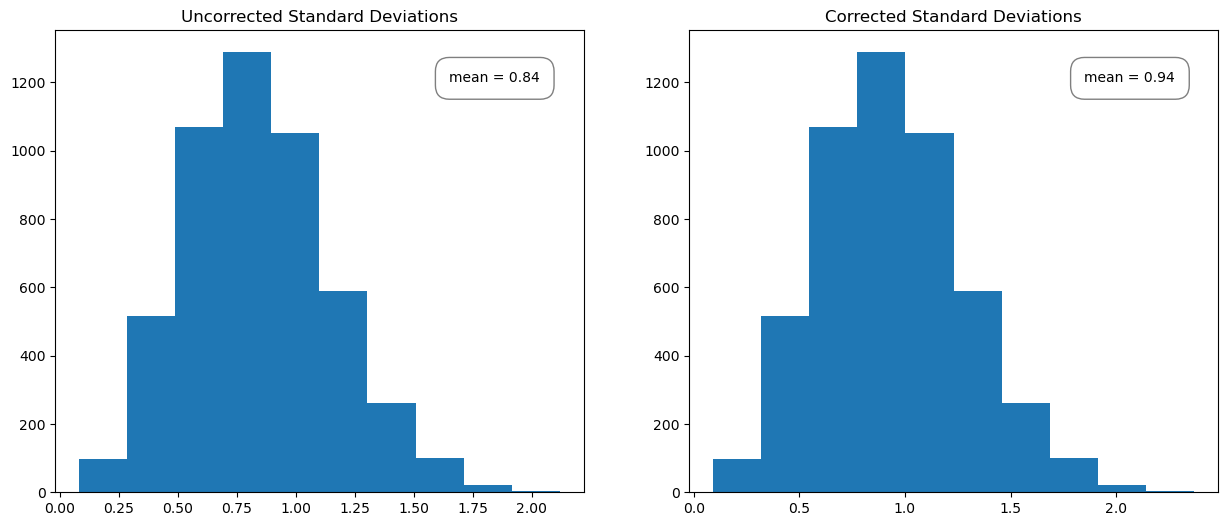

In [4]:
uncorrected = []
corrected = []
for x in range(1,5000):
    samples = np.random.normal(loc=5.0, scale=1.0, size = 5)
    uncorrected.append(np.std(samples, ddof=0))
    corrected.append(np.std(samples, ddof=1))

fig, ax = plt.subplots(1,2)
fig.set_size_inches(15,6)
ax[0].hist(uncorrected);
ax[1].hist(corrected);
ax[0].text(1.65, 1200, f'mean = {np.mean(uncorrected):.2}',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':1, 'boxstyle':"round"})
ax[1].text(1.85, 1200, f'mean = {np.mean(corrected):.2}',
        bbox={'facecolor':'white', 'alpha':0.5, 'pad':1, 'boxstyle':"round"})
ax[0].set_title("Uncorrected Standard Deviations");
ax[1].set_title("Corrected Standard Deviations");

We expect the biased sample to underestimate the population variance, which we can see in the graph on the left. Note that the shape of the histogram is the same, just shifted slightly left.

### Uncertainty in our estimators $\overline{x}$ and $s$

When $N$ is large (at least ten or so), and if the variance of $h(x)$ is finite, we expect from the central limit theorem (in chapter 3.4) that $x$ and $s$ will be distributed around their values given by eqs. 1 and 2 according to Gaussian distributions with the widths (standard errors) equal to

$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$

which is called *the standard error of the mean*, and

$$ \sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}} \sigma_\overline{x},$$

which is the *error of the standard deviation.*

Note that for large $N$, the uncertainty of the location parameter is about 40% larger than the uncertainty of the scale parameter ($\sigma_\overline{x}$ $\sim$ $\sqrt{2}\sigma_s$). Note also that for small $N$, $\sigma_s$ is not much smaller than $s$ itself.

### Example of standard deviation vs. standard error

**Standard deviation**: Imagine we flip a coin 16 times; this will be one trial. As the number of trials goes to infinity, the number of heads flipped in one trial will yield a normal distribution with mean $\mu$ = 8 and std $\sigma$ = 2. No matter how many measurements we perform, the standard deviation will not reduce as its a property intrinsic to the nature of the coin.

**Standard error**: The average number of heads in a 16 flip coin toss is eight since each side has a 50/50 chance of being landed on. With enough measurements, the error of that estimate of the mean number of heads can become arbitrarily small.

Below is the distribution of a 16-flip coin toss for $N = 5000$ and $N = 15000$

Mean = 8.0, Std = 2.0
Mean = 8.0, Std = 2.0


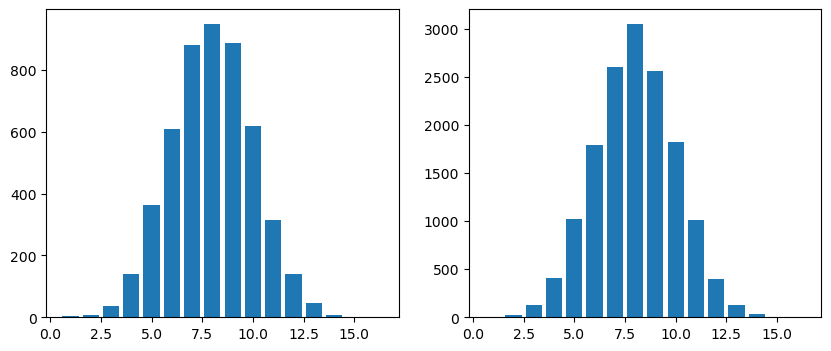

In [5]:
import numpy as np
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)
np.random.seed(42)
N = [5000, 15000]

for m,k in enumerate (N):
    y = np.random.binomial(n=16, p=0.5, size=k) # N trials of 16 flip toss
    values = []
    x = np.linspace(1,16, num = 16)
    for i in range(1,17):
        values.append(np.count_nonzero(y == i))
    ax[m].bar(x,values)
    print(f'Mean = {np.mean(y):.2}, Std = {np.std(y):.2}')

Thus we can see that increasing $N$ *does not* decrease the standard deviation.

The standard error of the mean, on the other hand, *does* decrease with increasing $N$. We'll import `sem` from `scipy.stats`, which computes the standard error. Then we'll use `np.random.binomial` again to simulate a 16-flip coin toss and increase the size of $N$ on each iteration.

In [6]:
from scipy.stats import sem
j = []
for i in [3,30,100,1000]:
    sample = np.random.binomial(n=16, p=0.5, size= i)
    sample = round(sem(sample),2)
    j.append(sample)
print(j)

[0.88, 0.35, 0.17, 0.06]


### Estimator efficiency
Estimators can be compared in terms of their **efficiency**, which measures how large a sample is required to obtain a given accuracy.

For example, the median determined from data drawn from a Gaussian distribution shows a scatter around the true location parameter, $\mu$, larger by a factor of $\pi/2 \sim 1.253$ than the scatter of the mean value (see eq. 3 below). Since the scatter decreases with $1/\sqrt{N}$, the efficiency of the mean is $\pi/2$ times larger than the efficiency of the median.

An estimator is asymptotically normal if its distribution around the true value approaches a Gaussian distribution for large sample size, with variance decreasing proportionally to $1/N$.
The smallest attainable variance for an unbiased estimator is called the **minimum variance bound (MVB)** and such an estimator is called the **minimum variance unbiased estimator (MVUE).**

### Robust descriptive statistics

For the case of real data, which can have “outliers,” quantiles offer a more robust method for determining location and scale parameters than the mean and standard deviation.
* The median is a much more robust estimator of the location than the mean
* The interquartile range $(q_{75} − q_{25})$ is a more robust estimator of the scale parameter than the standard deviation.

In other words, the median and interquartile range are much less affected by the presence of outliers than the mean and standard deviation.

For example, if you take 25% of your measurements that are larger than $q_{75}$ and arbitrarily modify them by adding a large number to all of them (or multiply them all by a large number/different large numbers), both the mean and the standard deviation will be severely affected. However, the median and the interquartile range will remain constant.

Furthermore, even in the absence of outliers, for some distributions that do not have finite variance, such as the Cauchy distribution, the median and the interquartile range are the best choices for estimating location and scale parameters. We often see the interquartile range renormalized so that the width estimator, $\sigma_G$, becomes an unbiased estimator of $\sigma$ for a Gaussian distribution,

$$\sigma_G = 0.7413(q_{75}-q_{25}) $$



In [7]:
import numpy as np

np.random.seed(0)
x = np.random.normal(size=1000) # 1000 normally distributed points


There are downsides to robustness; as we have already discussed, the efficiency of the median as a location parameter is worse than that of the mean in the case of a Gaussian distribution. Additionally, it's much easier to compute the mean than the median for large samples. However, to avoid the possibility of outliers severely affecting results, one might be willing to pay the price of $\sim$ 25% larger errors.

To compute the standard error, $\sigma_{qp}$ for an arbitrary quantile $q_p$, we can use

$$\sigma_{qp} = \frac{1}{h_p}\sqrt{\frac{p(1-p)}{N}} $$

where $h_p$ is the value of the probability distribution function at the $p$th percentile (e.g., for the median, $p = 0.5$). For a Gaussian, the standard error for the median is

$$ \sigma_{q^{50}} = s\sqrt{\frac{\pi}{2N}} $$

with $h_{50} = 1/(s\sqrt{2\pi})$ and $s \sim \sigma$ in the limit of large $N$.

To demonstrate robust statistics, we'll sample a Gaussian with and without outliers. We expect the mean and standard deviation to be heavily affected by the outliers, but the median and $\sigma_G$ to be less affected. To represent the Gaussian with outliers, we'll put together a sample where we'll draw 95% of the data from a normal Gaussian distribution and 5% from a Cauchy distribution. We'll draw the Gaussian samples using `np.random.normal`. For the 5% outliers, we'll import `Cauchy` from `scipy.stats` and call `cauchy.rvs` to draw five samples from a Cauchy distribution. Then we'll concatenate the 95 normal samples with five outlier data points to create a Gaussian with outliers. We'll set the location parameter $\mu$ to eight to prevent our graph from going negative for a more readable graph.

In [8]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
from scipy.stats import cauchy

normal = np.random.normal(loc=8.0, scale=1.0, size=100) # 100 samples from a Gaussian

a = np.random.normal(loc=8.0, scale=1.0, size=95) #95 samples from a Gaussian
b = cauchy.rvs(loc=8.0, scale=20, size=5) #5 samples from a Cauchy
normal_with_outliers = np.concatenate([a, b]) # combine to create Gaussian with outliers

Next, we'll plot two bar graphs: one that shows the mean and standard deviations and one with the median and $\sigma_G$ for both the normal distribution and the normal with outliers.

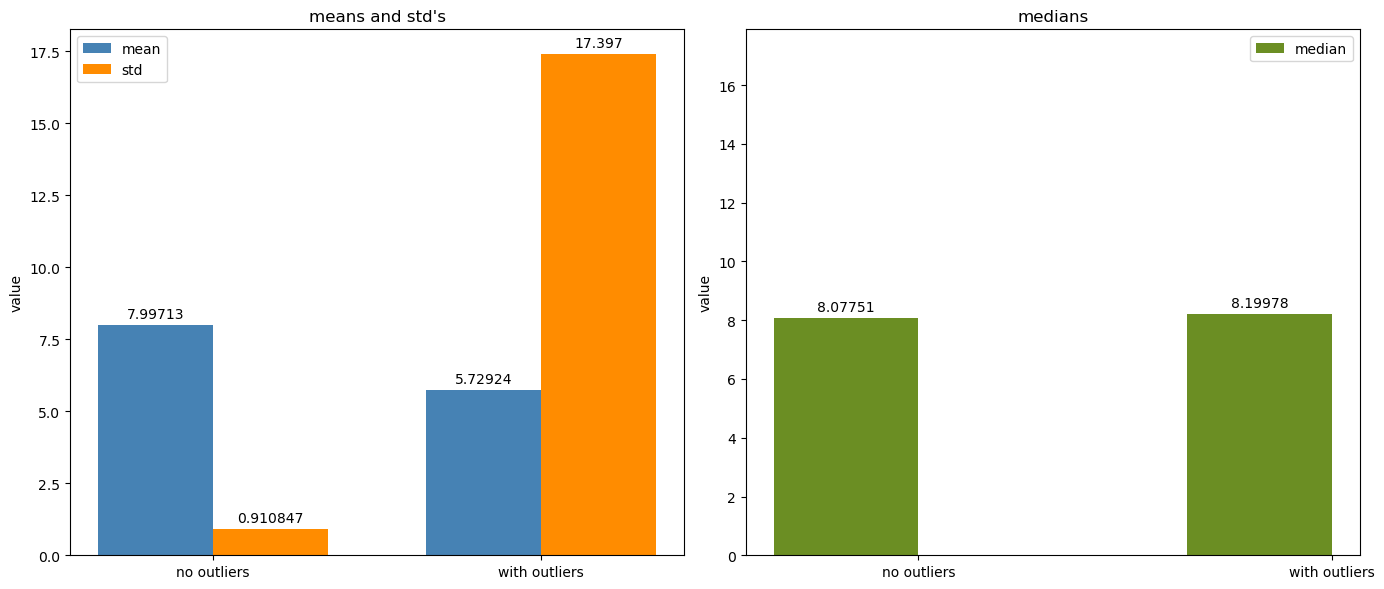

In [9]:
labels = ['no outliers', 'with outliers']
means = [np.mean(normal),np.mean(normal_with_outliers)]
standard_deviations = [np.std(normal),np.std(normal_with_outliers)]
medians = [np.median(normal), np.median(normal_with_outliers)]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,6)
rects1 = ax[0].bar(x - width/2, means, width, label='mean', color = 'steelblue')
rects2 = ax[0].bar(x + width/2, standard_deviations, width, label='std', color = 'darkorange')
rects3 = ax[1].bar(x - width/2, medians, width, label='median', color = 'olivedrab')


titles = ["means and std's","medians"]
rected = [(1,2),(3,4)]
for i in [0,1]:
    ax[i].set_ylabel('value')
    ax[i].set_xticks(x);
    ax[i].set_xticklabels(labels)
    ax[i].legend()
    ax[i].set_title(titles[i])

combined = means + standard_deviations + medians
ax[1].set_ylim([0, np.max(combined)+0.5])

ax[0].bar_label(rects1, padding=3)
ax[0].bar_label(rects2, padding=3)
ax[1].bar_label(rects3, padding=3)

fig.tight_layout()
plt.show()

We can see that the median and $\sigma_G$ are mostly unaffected by the presence of outliers, whereas the mean and standard deviation are more affected.